### Import Packages

In [84]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

### About Dataset

In [2]:
Raw_Data = pd.read_csv("./bike-sharing-demand/train.csv")

In [3]:
Raw_Data.shape

(10886, 12)

In [4]:
Raw_Data.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [5]:
Raw_Data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
Raw_Data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

### Check Independent Variables

[Text(0, 0.5, 'humidity'), Text(0.5, 1.0, 'Histogram on humidity')]

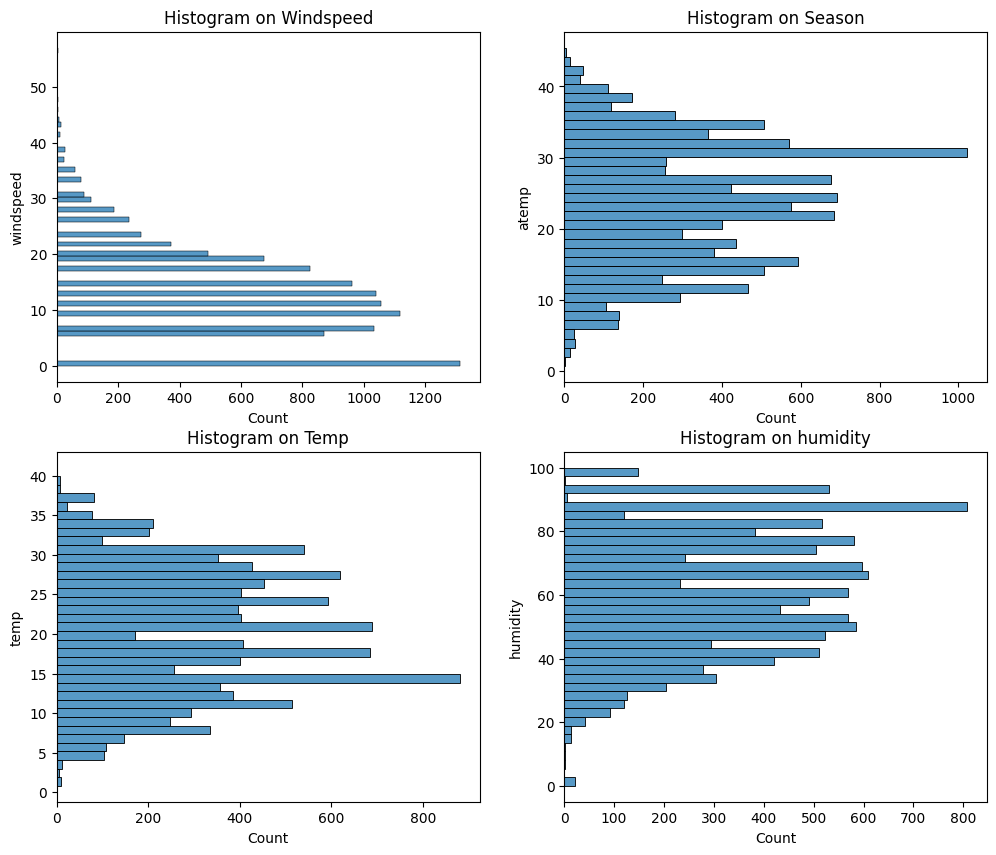

In [90]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(12, 10)

sn.histplot(data=Raw_Data,y="windspeed",ax=axes[0][0])
sn.histplot(data=Raw_Data,y="atemp",ax=axes[0][1])
sn.histplot(data=Raw_Data,y="temp",ax=axes[1][0])
sn.histplot(data=Raw_Data,y="humidity",ax=axes[1][1])

axes[0][0].set(ylabel='windspeed',title="Histogram on Windspeed")
axes[0][1].set(ylabel='atemp', title="Histogram on Season")
axes[1][0].set(ylabel='temp',title="Histogram on Temp")
axes[1][1].set(ylabel='humidity',title="Histogram on humidity")

### Feature Engineering

In [7]:
T_Data = Raw_Data

In [8]:
T_Data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
T_Data["hour"] = Raw_Data.datetime.apply(lambda x : x.split()[1].split(":")[0])
T_Data["date"] = pd.to_datetime(Raw_Data['datetime']).dt.date.astype('str')
#T_Data["date"] = Raw_Data.datetime.apply(lambda x : x.split()[0])
#T_Data["time"] = pd.to_datetime(Raw_Data['datetime']).dt.time

In [10]:
T_Data["weekday"] = T_Data.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
T_Data["month"] = T_Data.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
T_Data["season"] = T_Data.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
T_Data["weather"] = T_Data.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [11]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    T_Data[var] = T_Data[var].astype("category")

#Raw_Data  = Raw_Data.drop(["datetime"],axis=1)

In [12]:
T_Data  = T_Data.drop(["datetime"],axis=1)

In [13]:
T_Data.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
hour          category
date            object
weekday       category
month         category
dtype: object

In [81]:
#a = T_Data.get_dtype_counts()
a = T_Data.dtypes.value_counts()
a
#a.groupby("month")["count"].mean()
#dataTypeDf = pd.DataFrame().reset_index().rename(columns={"index":"variableType",0:"count"})
#dataTypeDf
#fig,ax = plt.subplots()
#fig.set_size_inches(12,5)
#sn.barplot(data=dataTypeDf,x="variableType",y="count")#ax=ax)
#ax.set(xlabel='variableTypeariable Type', ylabel='Count',title="Variables DataType Count")

int64       4
float64     3
category    2
category    1
category    1
category    1
object      1
category    1
category    1
dtype: int64

<AxesSubplot:>

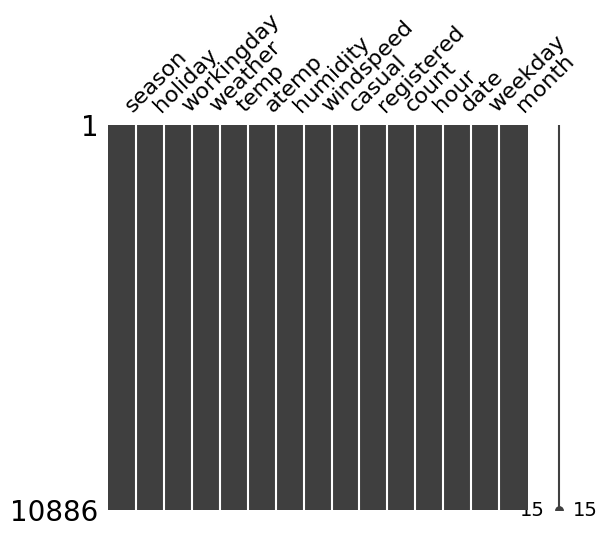

In [74]:
msno.matrix(T_Data,figsize=(6,5))

### Outliers Detection

C:\Users\chuqi\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

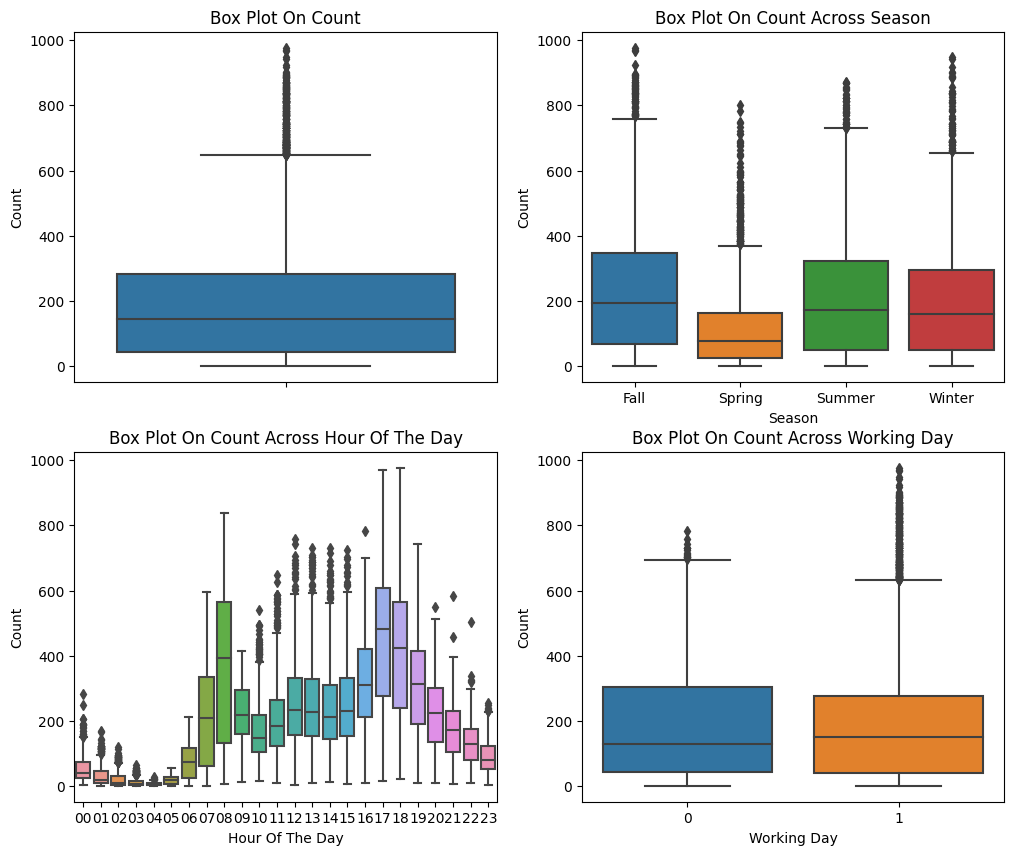

In [37]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=T_Data,y="count",orient="h",ax=axes[0][0])
sn.boxplot(data=T_Data,y="count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=T_Data,y="count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=T_Data,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

In [63]:
C_Data = T_Data[np.abs(T_Data["count"]-T_Data["count"].mean())<=(3*T_Data["count"].std())]
print ("Shape Of The Before Ouliers: ",T_Data.shape)
print ("Shape Of The After Ouliers: ",C_Data.shape)

Shape Of The Before Ouliers:  (10886, 15)
Shape Of The After Ouliers:  (10739, 15)


### Correlation Evaluation

<AxesSubplot:>

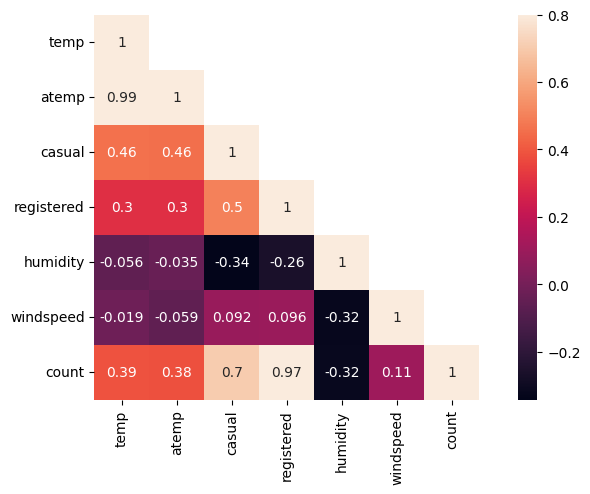

In [64]:
corrMatt = C_Data[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,5)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<AxesSubplot:xlabel='humidity', ylabel='count'>

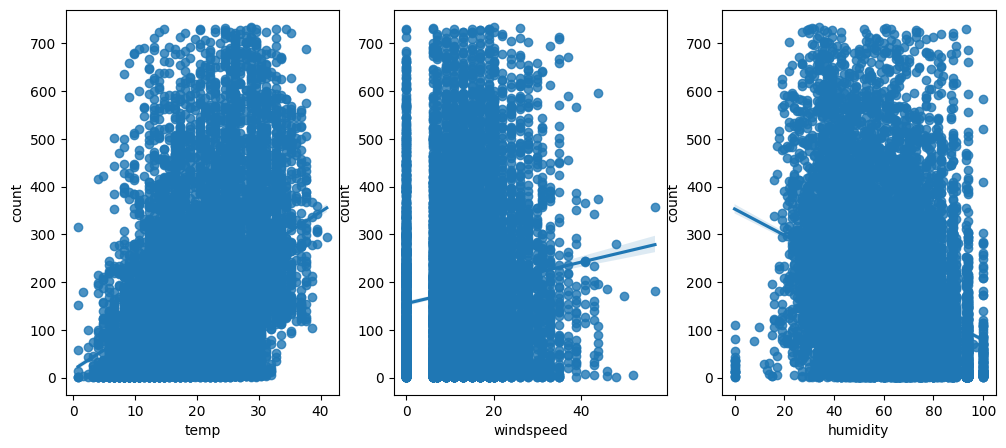

In [65]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sn.regplot(x="temp", y="count", data=C_Data,ax=ax1)
sn.regplot(x="windspeed", y="count", data=C_Data,ax=ax2)
sn.regplot(x="humidity", y="count", data=C_Data,ax=ax3)


### Distribution Plot & Probability Plot

C:\Users\chuqi\AppData\Local\Temp\ipykernel_18180\3357182705.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(np.log(C_Data["count"]),ax=axes1)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.        , 0.        , 0.        , ..., 6.59578051, 6.5971457 ,
         6.59850903])),
 (1.4096846101542901, 4.523106928071492, 0.9537631807794258))

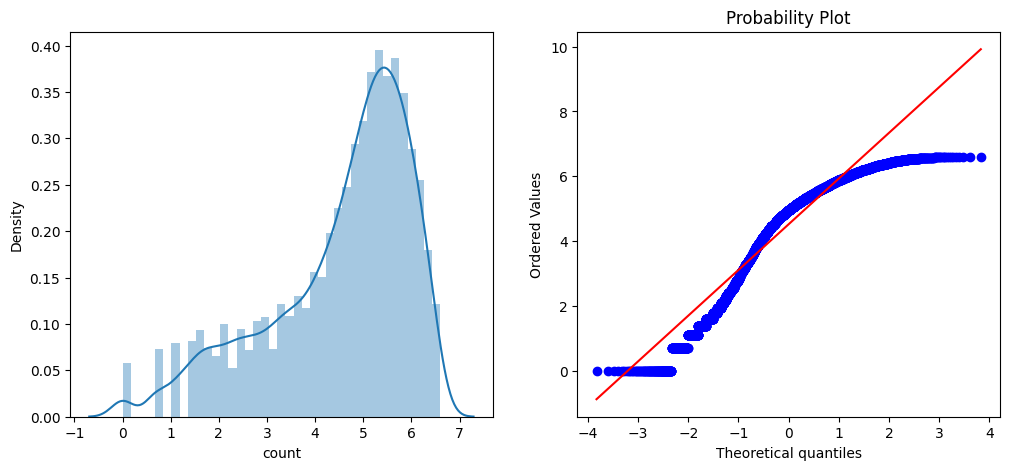

In [68]:
fig,(axes1, axes2) = plt.subplots(ncols=2,nrows=1)
fig.set_size_inches(12, 5)
sn.distplot(np.log(C_Data["count"]),ax=axes1)
stats.probplot(np.log(C_Data["count"]), dist='norm', fit=True, plot=axes2)

### Further Data Visulisation

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

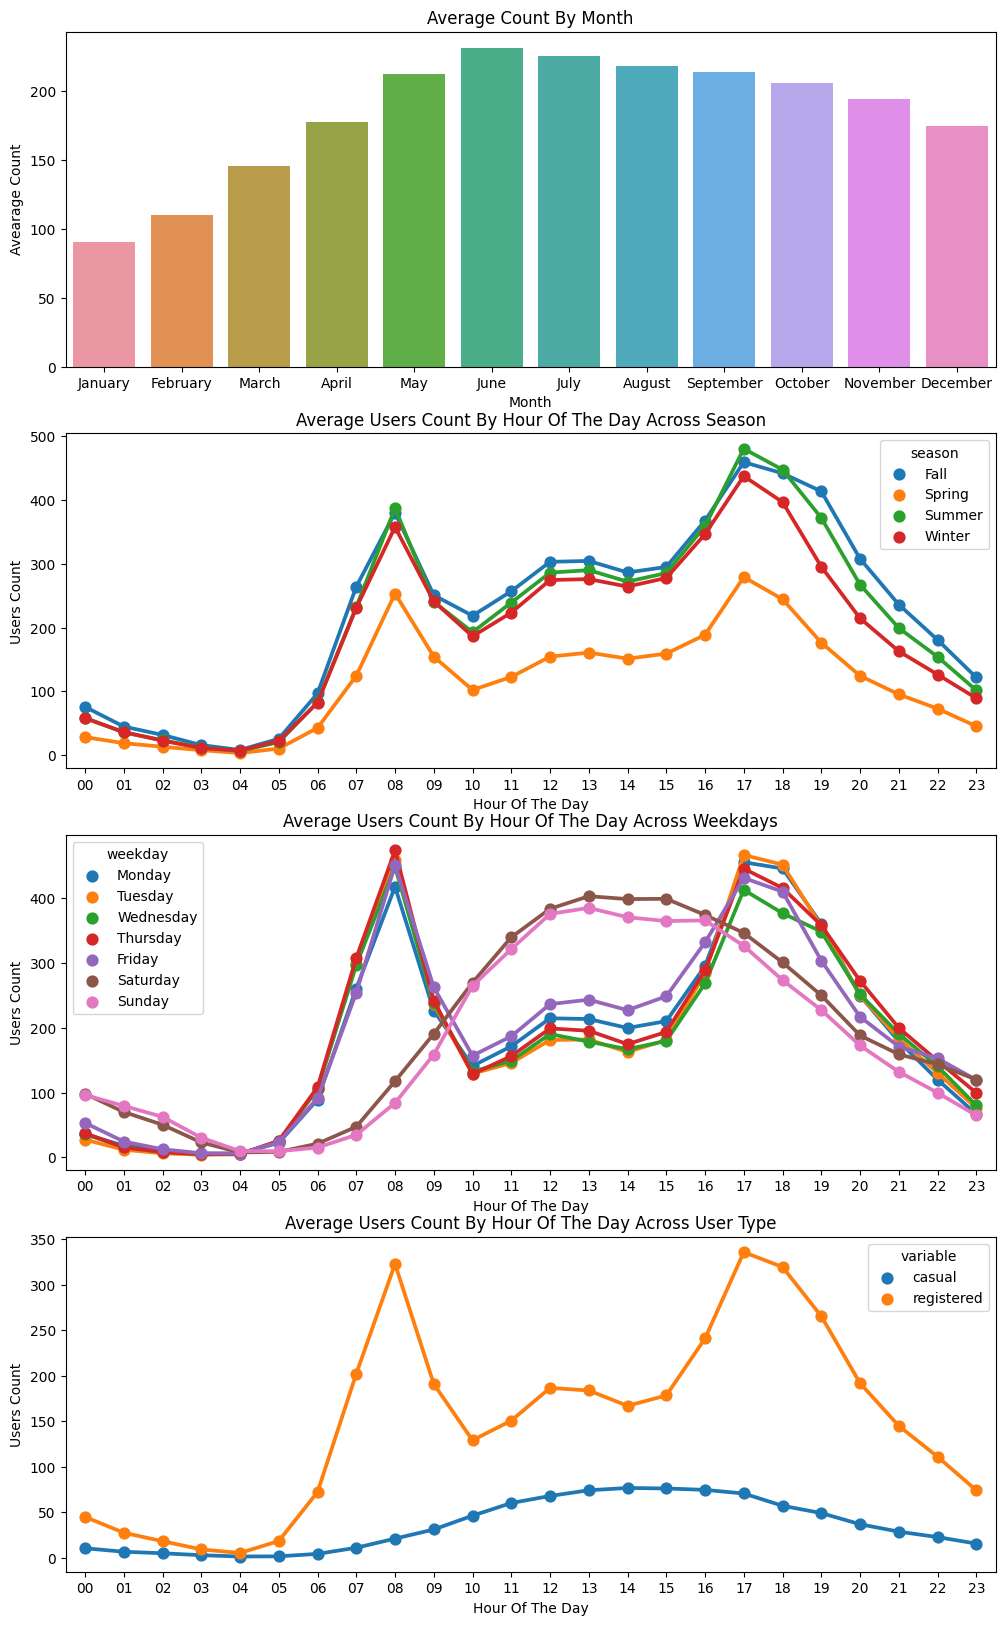

In [73]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

monthAggregated = pd.DataFrame(C_Data.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(C_Data.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(C_Data.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(C_Data[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

### Model Fit & Prediction

In [83]:
dataTest = pd.read_csv("./bike-sharing-demand/test.csv")